# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.198115e+01     1.464192e+01
 * time: 0.004840850830078125
     1     6.187411e+01     8.335049e+00
 * time: 0.014678955078125
     2     5.669012e+01     1.149827e+01
 * time: 0.03889584541320801
     3     4.000077e+01     7.919690e+00
 * time: 0.06886696815490723
     4     2.958165e+01     7.163234e+00
 * time: 0.28865694999694824
     5     2.188158e+01     5.405298e+00
 * time: 0.3142378330230713
     6     1.876717e+01     5.429044e+00
 * time: 0.335860013961792
     7     1.002556e+01     2.152173e+00
 * time: 0.3575878143310547
     8     9.155758e+00     2.088903e+00
 * time: 0.3789558410644531
     9     8.616821e+00     2.084404e+00
 * time: 0.40085887908935547
    10     8.393144e+00     3.719607e+00
 * time: 0.4190559387207031
    11     8.303158e+00     1.783592e+00
 * time: 0.43732404708862305
    12     8.108622e+00     1.266893e+00
 * time: 0.45543599128723145
    13     7.782662e+00     1.699867e+00
 * time: 0.4737

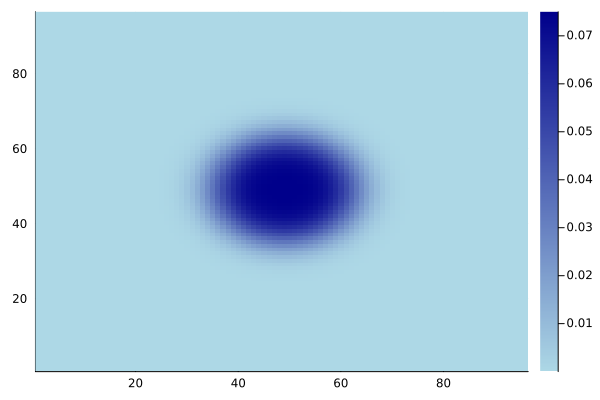

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)